In [ ]:
#%%bash
#. ./create_datasets.sh

In [3]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

{'occupied': '/home/kontiki/projects/my/ipython-notebooks/tmp/caffe_classifier/datasets/val/occupied', 'empty': '/home/kontiki/projects/my/ipython-notebooks/tmp/caffe_classifier/datasets/val/empty'}


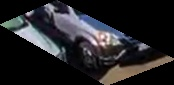

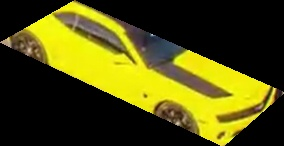

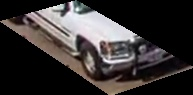

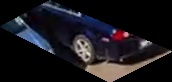

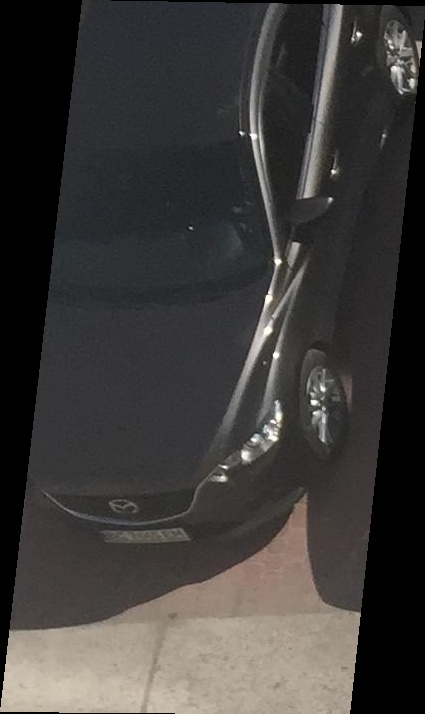

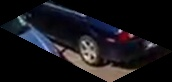

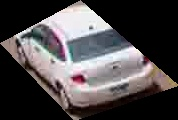

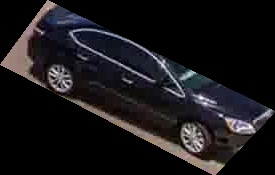

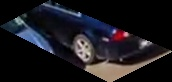

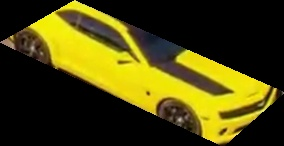

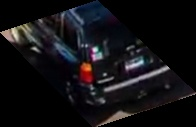

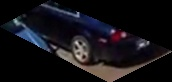

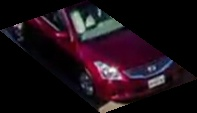

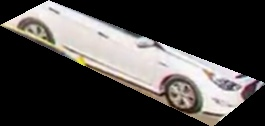

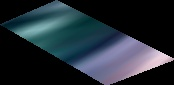

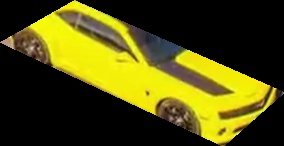

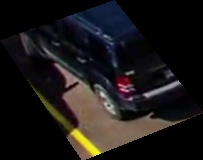

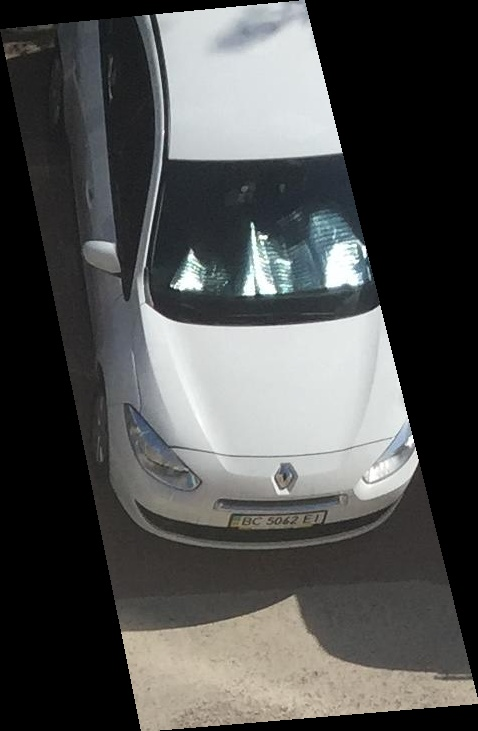

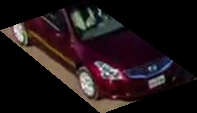

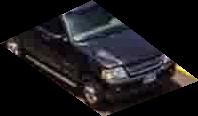

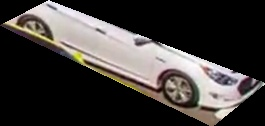

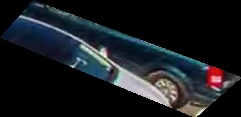

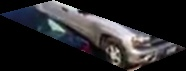

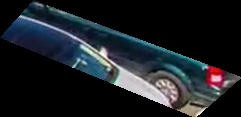

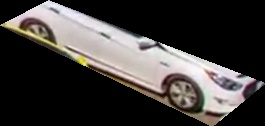

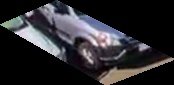

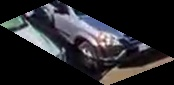

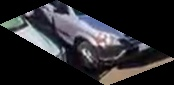

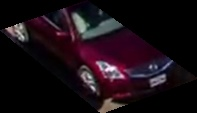

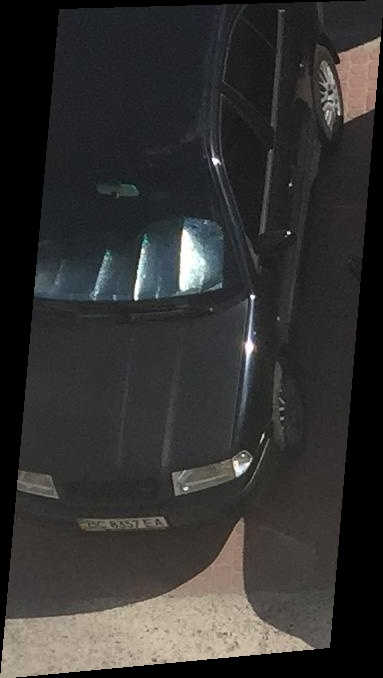

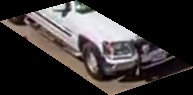

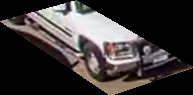

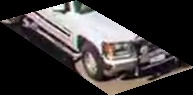

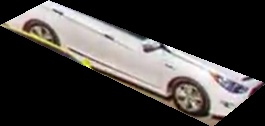

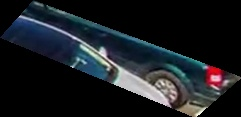

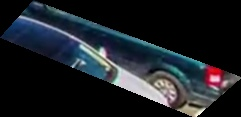

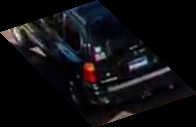

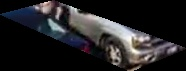

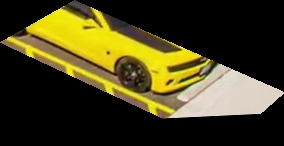

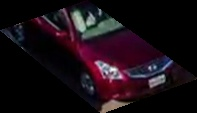

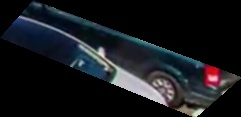

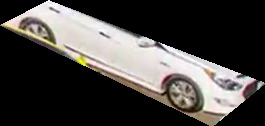

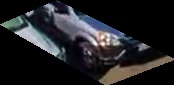

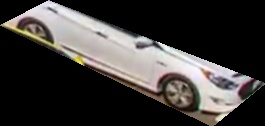

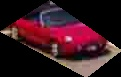

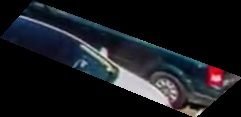

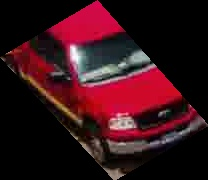

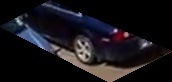

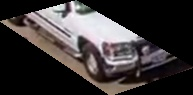

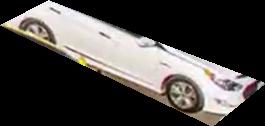

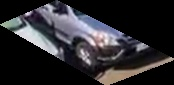

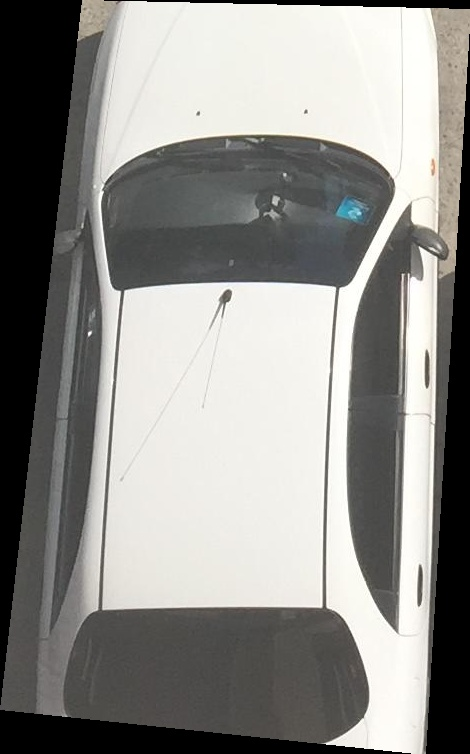

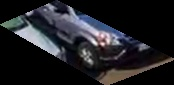

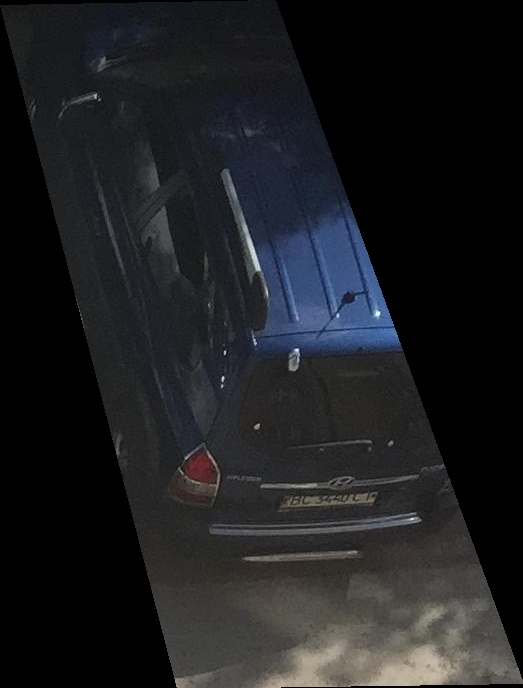

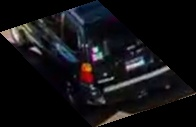

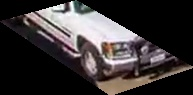

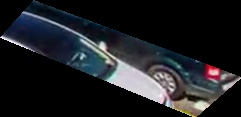

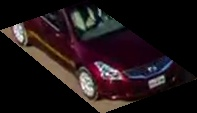

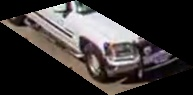

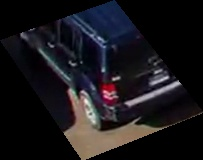

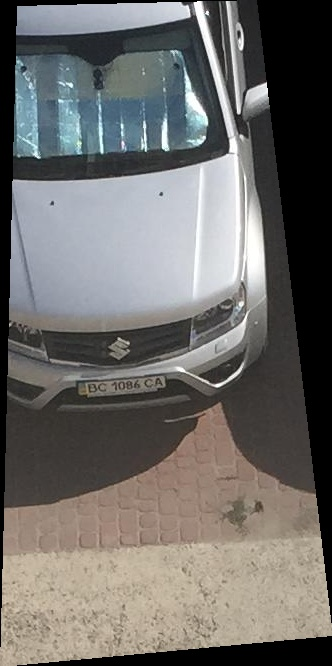

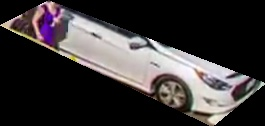

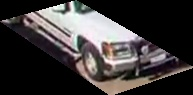

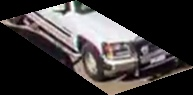

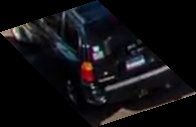

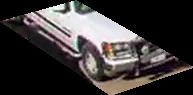

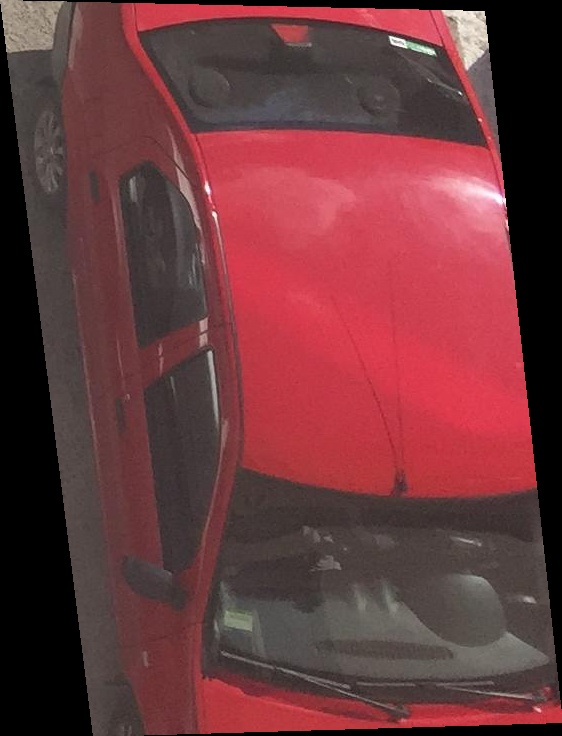

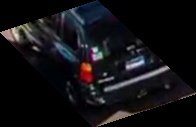

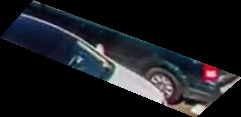

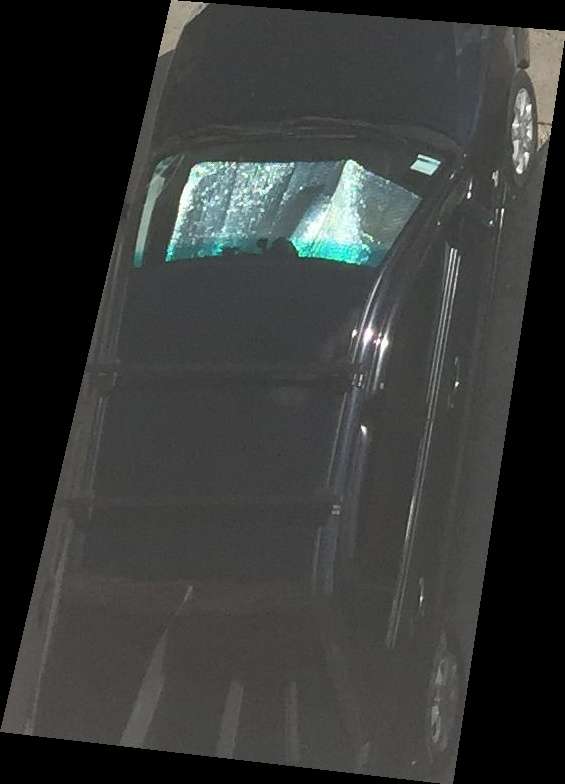

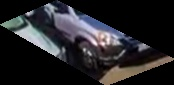

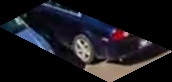

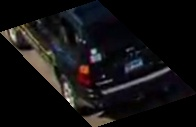

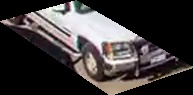

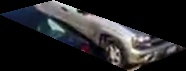

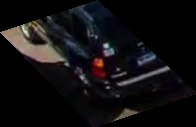

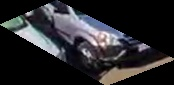

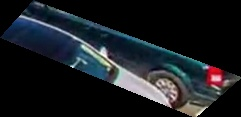

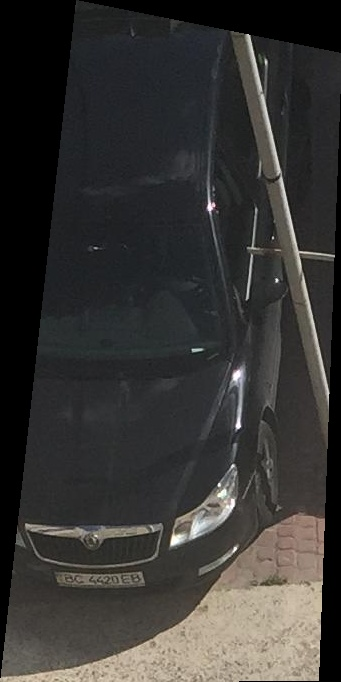

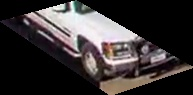

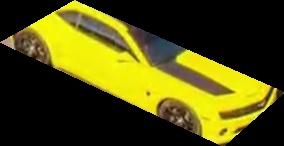

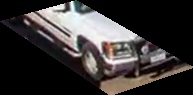

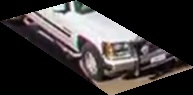

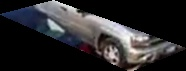

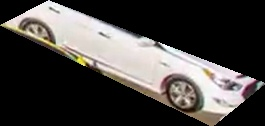

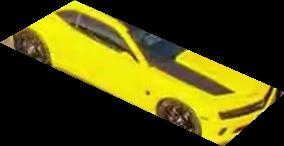

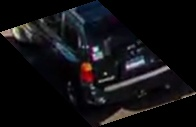

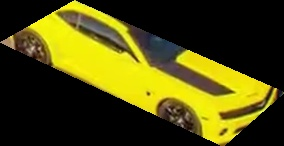

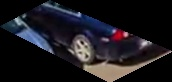

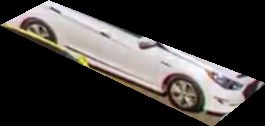

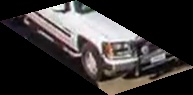

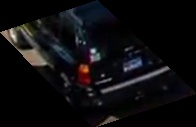

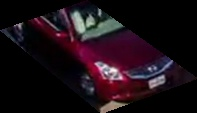

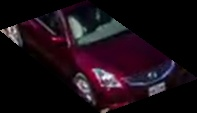

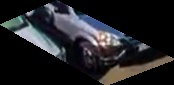

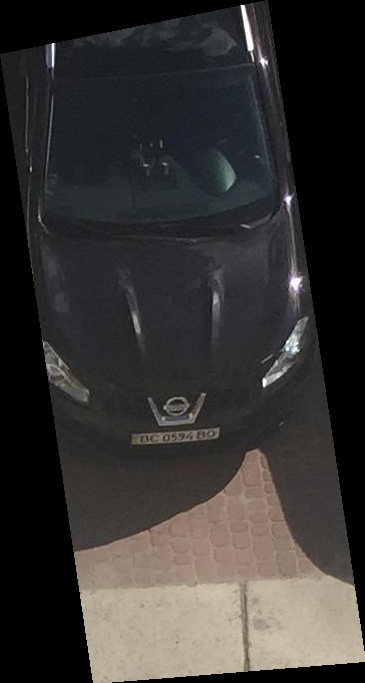

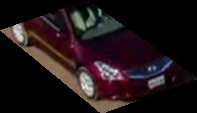

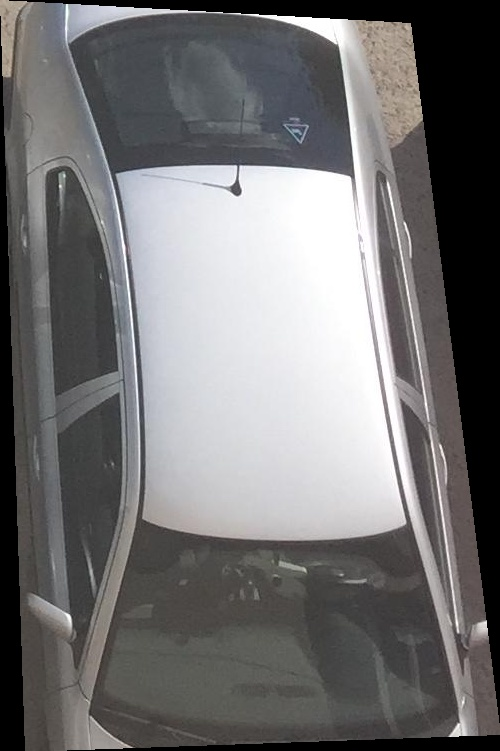

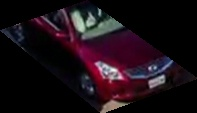

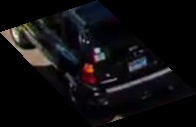

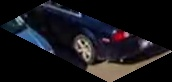

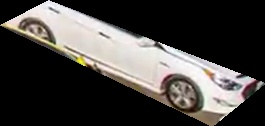

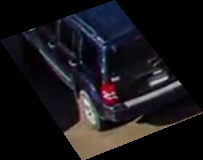

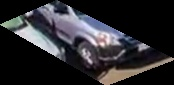

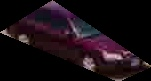

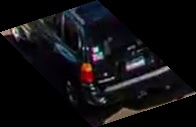

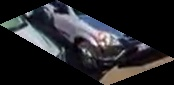

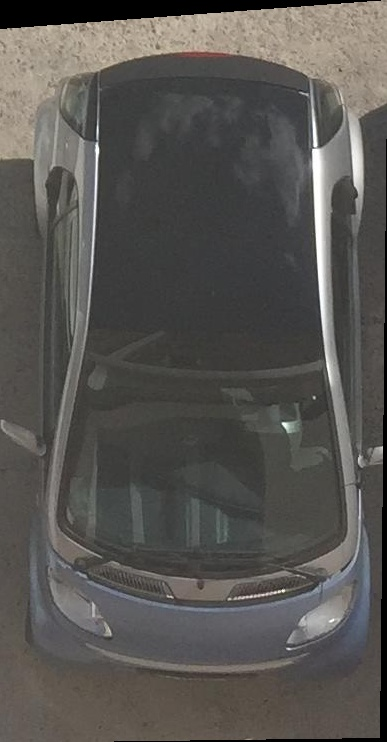

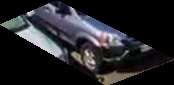

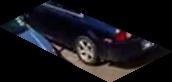

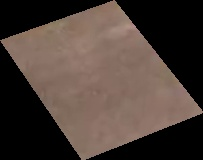

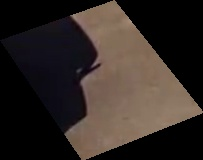

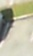

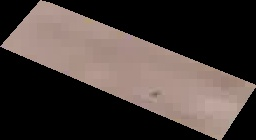

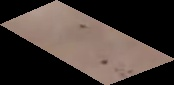

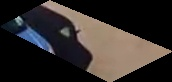

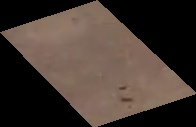

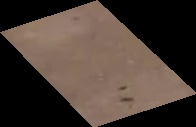

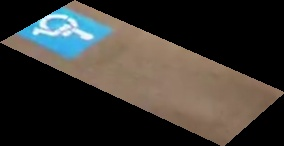

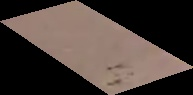

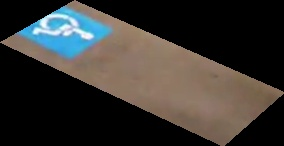

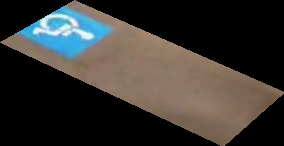

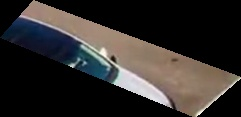

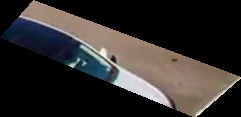

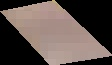

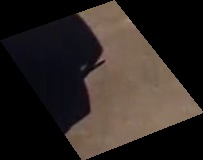

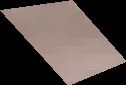

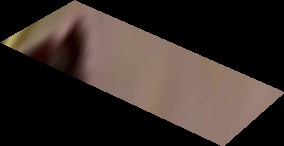

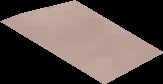

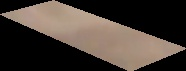

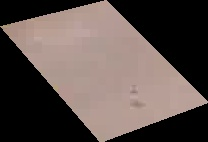

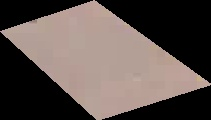

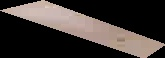

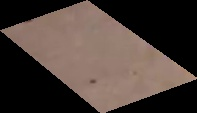

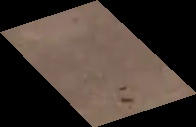

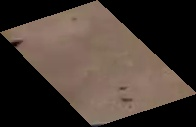

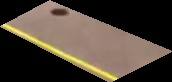

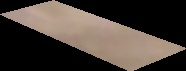

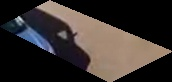

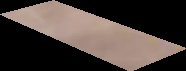

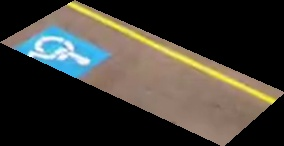

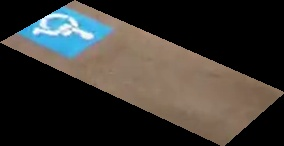

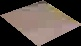

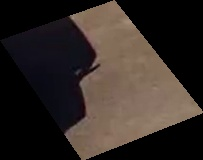

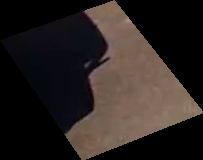

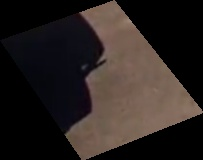

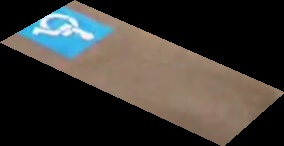

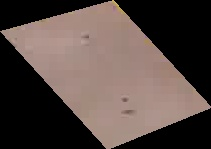

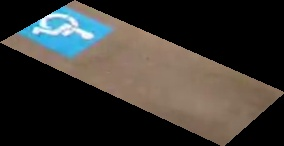

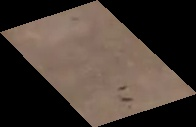

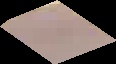

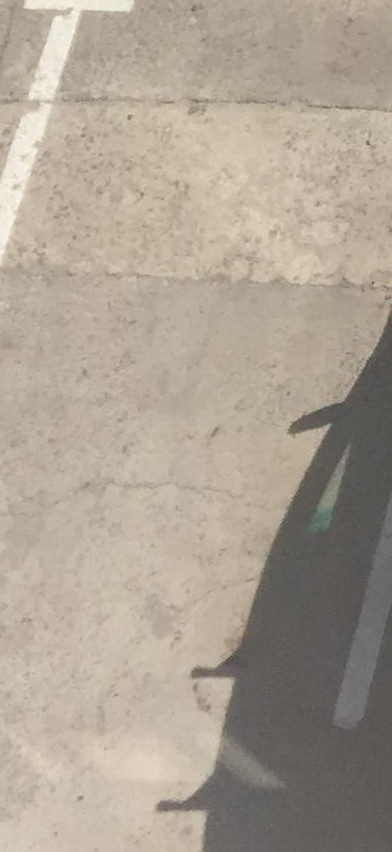

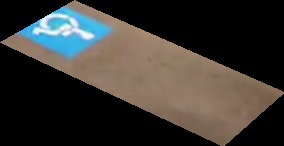

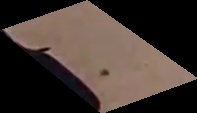

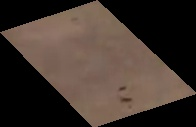

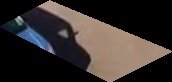

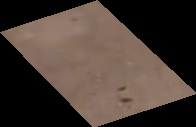

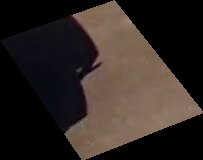

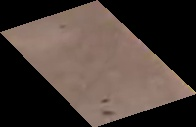

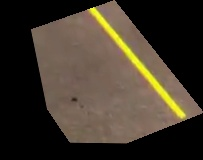

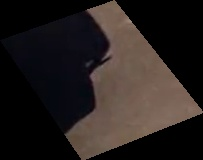

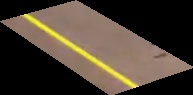

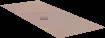

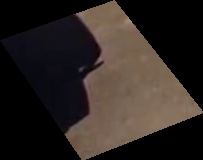

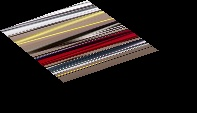

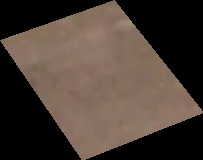

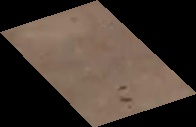

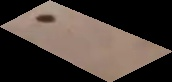

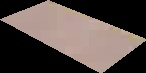

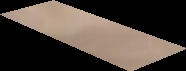

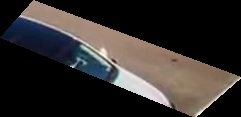

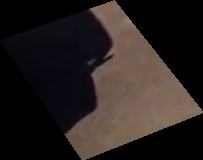

wrong: 27, total: 172


In [2]:
import cv2
import glob
import sys
import os
from IPython.display import Image, display, HTML


work_dir = os.path.dirname(os.path.realpath('__file__'))
sys.path.append(os.path.join(os.path.dirname(work_dir),"caffe_classifier"))

from lot_classifier import LotClassifier
from settings import model, dataset, labels_mapping, val_dataset

def test_classifier():
    classifier = LotClassifier(model["model_def_file"], model["model_file"], labels_mapping, model["mean_file"])

    wrong, total = 0, 0
    print val_dataset
    for group in val_dataset.items():
        for img_file in glob.glob(group[1] + "/*.jpg"):
            title = "correct"
            if classifier.predict(cv2.imread(img_file)) != group[0]:
                wrong += 1
                title = "wrong"
                

            #print "predicted:%s, real: %s, location:%s" % (
            #    classifier.predict(cv2.imread(img_file)), group[0], img_file)
            total += 1
            display(HTML("<b>%s : %s</b>"%(title,group[0])))
            display(Image(filename=img_file))
                
    print "wrong: %s, total: %s" % (wrong, total)

    
test_classifier()